In [ ]:
import os
import random
import shutil
!pip install labelme tensorflow opencv-python matplotlib albumentations

In [7]:
!dir="/mnt/e/UBB_IE_2020-2023/S6.BE/v3_backup_$(date +%Y-%m-%d_%H-%M-%S)/"; mkdir "$dir" && cp -r /mnt/e/UBB_IE_2020-2023/S6.BE/v3/{tracker.h5,data,aug_data} "$dir"

In [6]:
import re
import os


def remove_files(directory, pattern):
    for root, dirs, files in os.walk(directory):
        for file in filter(lambda x: re.match(pattern, x), files):
            os.remove(os.path.join(root, file))


remove_files('data', '.*\.(jpg|json)')
remove_files('aug_data', '.*\.(jpg|json)')

In [72]:
from braceexpand import braceexpand

# https://www.google.com/search?q=python+make+dirs+like+bash+bracket+expansion -> https://stackoverflow.com/questions/22996645/brace-expansion-in-python-glob
def make_data_dirs_tree(brace_patter_path):
    for file in braceexpand(brace_patter_path):
        os.makedirs(file)

In [71]:
#!mkdir -p data/{,train,test,val}/{images,labels}
dirs_glob_pattern = os.path.join('data', '{,train,test,val}', '{images,labels}')
make_data_dirs_tree(dirs_glob_pattern)

In [1]:
import os
import time
import uuid
import cv2

In [2]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    cv2.imshow('frame', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

90 lumina aprina aproape (si in colturi)  
90 lumina stinsa aproape (si in colturi)  
90 lumina aprinsa departe (si in colturi)  
90 lumina stinsa departe (si in colturi)  

In [ ]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 30

cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH, f'{(imgnum + 1):02d}_{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
!find . -iwholename "**/cv2/qt/plugins" -exec rm -r {} \;
!labelme --autosave --output data/labels

In [19]:
import os
import shutil
from datetime import datetime

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

source_dir = 'data'
destination_dir = os.path.join('..', f'v3_data_backup_{datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}')
copytree(source_dir, destination_dir)
# !cp -r data ../v3_data_backup_$(date +%Y-%m-%d_%H-%M-%S)

In [14]:
import tensorflow as tf
import json
import numpy as np
import os
from matplotlib import pyplot as plt

2023-11-25 22:03:14.184732: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-25 22:03:14.321962: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 22:03:14.853595: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 22:03:14.853742: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 22:03:14.908847: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [55]:
import os
images = tf.data.Dataset.list_files(os.path.join('data', 'images', '*.jpg'), shuffle=False)

2023-11-25 10:42:22.287583: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-25 10:42:22.456857: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data/images/*.jpg'

In [12]:
images.as_numpy_iterator().next()

b'data/images/0132fc4e-896c-11ee-aed7-df8acdbd3581.jpg'

In [52]:
def load_image(path): 
    byte_img = tf.io.read_file(path)
    loaded_image = tf.io.decode_jpeg(byte_img)
    return loaded_image

In [54]:
images = images.map(load_image)

NameError: name 'images' is not defined

In [ ]:
images.as_numpy_iterator().next()

In [16]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

In [18]:
image_generator = images.batch(4).as_numpy_iterator()

In [23]:
plot_images = image_generator.next()

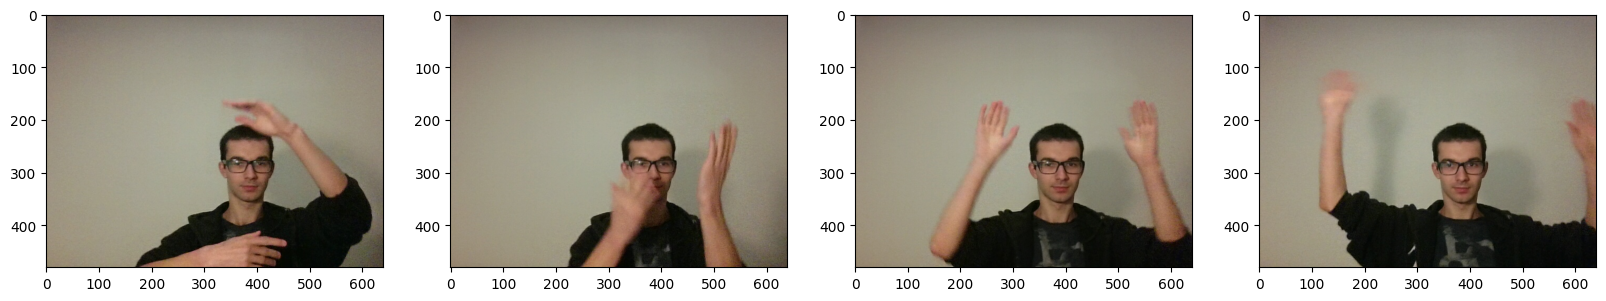

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# Split Images

In [30]:
len(os.listdir(os.path.join('data', 'images')))

0

In [10]:
## linux move n random files -> https://stackoverflow.com/questions/14033129/how-to-move-a-given-number-of-random-files-on-unix-linux-os
# !shuf -n 63 -e data/images/* | xargs -i mv {} data/train/images
# !shuf -n 14 -e data/images/* | xargs -i mv {} data/test/images
# !shuf -n 13 -e data/images/* | xargs -i mv {} data/val/images
import os
import shutil
import random


def shuffle_and_move(count: int, data_dir: str):
    source_directory = os.path.join('data', 'images')
    destination_directory = os.path.join('data', data_dir, 'images')
    files = os.listdir(source_directory)
    random.shuffle(files)
    files = files[:count]
    for file in files:
        old_path = os.path.join(source_directory, file)
        new_path = os.path.join(destination_directory, file)
        shutil.move(old_path, new_path)


total = len(os.listdir(os.path.join('data', 'images')))
train_count = int(total * 0.75)
test_and_val = total - train_count
test_count = int(test_and_val * 0.5)
val_count = test_and_val - test_count

shuffle_and_move(train_count, 'train')
shuffle_and_move(test_count, 'test')
shuffle_and_move(val_count, 'val')

for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):

        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)

In [31]:
import cv2
import albumentations as alb

augmentor = alb.Compose([alb.RandomCrop(width=450, height=450),
                         alb.HorizontalFlip(p=0.5),
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2),
                         alb.RGBShift(p=0.2),
                         alb.VerticalFlip(p=0.5)],
                        bbox_params=alb.BboxParams(format='albumentations',
                                                   label_fields=['class_labels']))

In [33]:
img_name = os.listdir(os.path.join('data', 'train', 'images'))[0]
print(img_name)
img = cv2.imread(os.path.join('data', 'train', 'images', img_name))


03a1c04c-8bb4-11ee-b844-546ceb7ca989.jpg


In [35]:
with open(os.path.join('data', 'train', 'labels', img_name.replace('.jpg', '.json')), 'r') as f:
    label = json.load(f)

In [37]:
label['shapes'][0]['points']

[[552.2900763358779, 166.9083969465649],
 [615.3944020356233, 243.11704834605598]]

In [38]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [39]:
coords

[552.2900763358779, 166.9083969465649, 615.3944020356233, 243.11704834605598]

In [41]:
coords = list(np.divide(coords, [640,480,640,480]))

In [42]:
coords

[0.0013483644441793893,
 0.0007244288061916879,
 0.0015024277393447835,
 0.0010551955223353125]

In [45]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['hand'])

In [46]:
augmented['bboxes'][0][2:]

IndexError: list index out of range

In [47]:
augmented['bboxes']

[]

In [48]:
cv2.rectangle(augmented['image'],
              tuple(np.multiply(augmented['bboxes'][0][:2], [450, 450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450, 450]).astype(int)),
              (255, 0, 0), 2)

plt.imshow(augmented['image'])

IndexError: list index out of range

In [74]:
# !mkdir -p aug_data/{train,test,val}/{images,labels}
dirs_glob_pattern = os.path.join('aug_data', '{train,test,val}', '{images,labels}')
make_data_dirs_tree(dirs_glob_pattern)

In [49]:
for partition in ['train', 'test', 'val']:
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0, 0, 0.00001, 0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640, 480, 640, 480]))

        try:
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['hand'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'),
                            augmented['image'])

                annotation = {'image': image}

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0:
                        annotation['bbox'] = [0, 0, 0, 0]
                        annotation['class'] = 0
                    else:
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else:
                    annotation['bbox'] = [0, 0, 0, 0]
                    annotation['class'] = 0

                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.2517703201970444, 0.36094006568144493, 0.0, 0.0018494675822260831, 'hand'].
x_max is less than or equal to x_min for bbox [0.14401169950738923, 0.3229679802955665, 0.0023860837438424596, 0.5795361247947455, 'hand'].
x_max is less than or equal to x_min for bbox [0.14632081280788184, 0.32707307060755336, 0.0, 0.5875394389566625, 'hand'].
x_max is less than or equal to x_min for bbox [0.15016933497536952, 0.31886288998357964, 0.0, 0.5827968726675625, 'hand'].
y_max is less than or equal to y_min for bbox [0.06704125615763556, 0.16389573070607558, 0.1347752463054188, 0.0007183908045977474, 'hand'].
x_max is less than or equal to x_min for bbox [0.1032173645320198, 0.030480295566502506, 0.0008466748768473864, 0.2039203612479475, 'hand'].
x_max is less than or equal to x_min for bbox [0.10860529556650256, 0.027401477832512358, 0.0016163793103449286, 0.2039203612479475, 'hand'].
x_max is less than or equal to x_min for bbox [0.1055264778325124

In [53]:
def load_image(path): 
    byte_img = tf.io.read_file(path)
    loaded_image = tf.io.decode_jpeg(byte_img)
    return loaded_image

def load_images_into_dataset(dir_name: str):
    loaded_images = tf.data.Dataset.list_files(os.path.join('aug_data', dir_name, 'images', '*.jpg'), shuffle=False)
    loaded_images = loaded_images.map(load_image)
    loaded_images = loaded_images.map(lambda y: tf.image.resize(y, (120, 120)))
    loaded_images = loaded_images.map(lambda y: y / 255)
    return loaded_images

In [54]:
train_images = load_images_into_dataset('train')
test_images = load_images_into_dataset('test')
val_images = load_images_into_dataset('val')

In [55]:
train_images.as_numpy_iterator().next()

array([[[0.6181985 , 0.57898283, 0.54221815],
        [0.6150122 , 0.57579654, 0.53903186],
        [0.61599267, 0.576777  , 0.54001224],
        ...,
        [0.6449142 , 0.6086397 , 0.5601103 ],
        [0.64362746, 0.6122549 , 0.5612745 ],
        [0.64319855, 0.606924  , 0.5583946 ]],

       [[0.6107843 , 0.5715686 , 0.5323529 ],
        [0.60974264, 0.57052696, 0.5313113 ],
        [0.6156863 , 0.5764706 , 0.5372549 ],
        ...,
        [0.6505515 , 0.61917895, 0.56917894],
        [0.6401348 , 0.60876226, 0.5577819 ],
        [0.646875  , 0.6106005 , 0.56697303]],

       [[0.6197304 , 0.5805147 , 0.54129905],
        [0.6191176 , 0.57990193, 0.54068625],
        [0.6192402 , 0.5800245 , 0.5408088 ],
        ...,
        [0.64840686, 0.6170343 , 0.57389706],
        [0.65042895, 0.61905634, 0.5759191 ],
        [0.6458946 , 0.61452204, 0.5713848 ]],

       ...,

       [[0.51029414, 0.4343137 , 0.28186274],
        [0.47205883, 0.39362746, 0.2495098 ],
        [0.50281864, 0

# Prepare Labels

In [56]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding="utf-8") as f:
        label = json.load(f)

    return [label['class']], label['bbox']

In [57]:
def load_labels_into_dataset(dir_name: str):
    loaded_labels = tf.data.Dataset.list_files(os.path.join('aug_data', dir_name, 'labels', '*.json'), shuffle=False)
    loaded_labels = loaded_labels.map(lambda y: tf.py_function(load_labels, [y], [tf.int32, tf.float32]))
    return loaded_labels

train_labels = load_labels_into_dataset('train')
test_labels = load_labels_into_dataset('test')
val_labels = load_labels_into_dataset('val')

In [58]:
train_labels.as_numpy_iterator().next()


(array([1], dtype=int32),
 array([0.        , 0.33312976, 0.01491094, 0.50248235], dtype=float32))

# Combine Images and Labels

In [59]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(16140, 16140, 2640, 2640, 2700, 2700)

In [60]:
def zip_dataset(images_, labels):
    return tf.data.Dataset.zip((images_, labels)).shuffle(len(labels) + 1).batch(8).prefetch(4)

train = zip_dataset(train_images, train_labels)
test = zip_dataset(test_images, test_labels)
val = zip_dataset(val_images, val_labels)

In [61]:
len(train), len(test), len(val)

(2018, 330, 338)

In [62]:
train.as_numpy_iterator().next()[1]

2023-11-25 22:11:29.029445: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:22: Filling up shuffle buffer (this may take a while): 12067 of 16141
2023-11-25 22:11:31.837450: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


(array([[0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [1]], dtype=int32),
 array([[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.06551275, 0.17968498],
        [0.01175698, 0.01447181, 0.24492611, 0.3352162 ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.4526765 , 0.13771209, 0.8336289 , 0.5755884 ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.3046634 , 0.09083744, 0.50937057, 0.31634372]], dtype=float32))

In [63]:
data_samples = train.as_numpy_iterator()

In [64]:
res = data_samples.next()

2023-11-25 22:12:22.981028: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:22: Filling up shuffle buffer (this may take a while): 14563 of 16141
2023-11-25 22:12:24.073073: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


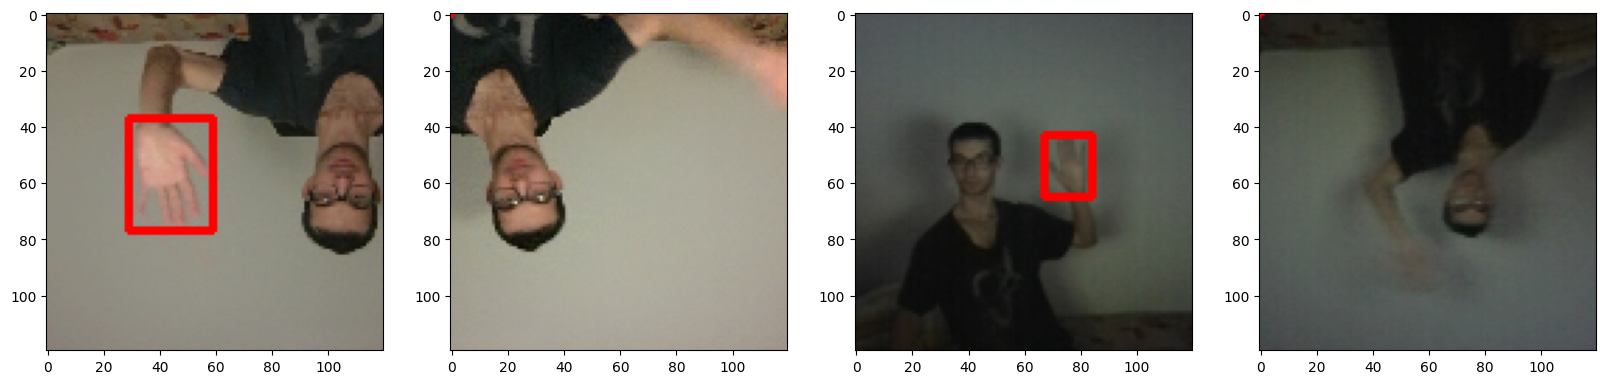

In [65]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]

    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                  (255, 0, 0), 2)

    ax[idx].imshow(sample_image)

# Create the Deep Learning Model

In [66]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [67]:
vgg = VGG16(include_top=False)

In [68]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [69]:
def build_model():
    input_layer = Input(shape=(120, 120, 3))

    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)

    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)

    tracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return tracker

In [70]:
tracker = build_model()

In [71]:
tracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [72]:
X, y = train.as_numpy_iterator().next()

2023-11-25 22:12:59.470466: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:22: Filling up shuffle buffer (this may take a while): 12800 of 16141
2023-11-25 22:13:01.509203: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


In [74]:
X.shape

(8, 120, 120, 3)

In [75]:
classes, coords = tracker.predict(X)

1/1 [==============================] - 1s 1s/step


In [76]:
classes, coords

(array([[0.26989412],
        [0.3307973 ],
        [0.3045965 ],
        [0.34686682],
        [0.36512387],
        [0.27115875],
        [0.35895088],
        [0.37835237]], dtype=float32),
 array([[0.52338076, 0.6169151 , 0.4928729 , 0.3187128 ],
        [0.4592886 , 0.5444752 , 0.46094945, 0.38942608],
        [0.51355505, 0.5491284 , 0.49428773, 0.39456096],
        [0.44407436, 0.58981836, 0.4125835 , 0.39023522],
        [0.5208081 , 0.52164185, 0.50173366, 0.39302477],
        [0.57142997, 0.570709  , 0.33280376, 0.4279713 ],
        [0.43407175, 0.54690623, 0.44455945, 0.40120828],
        [0.46050557, 0.48690322, 0.46030787, 0.44246897]], dtype=float32))

# Define Loss Functions

In [77]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [78]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001, decay=lr_decay)

In [79]:
def localization_loss(y_true, yhat):
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))

    h_true = y_true[:, 3] - y_true[:, 1]
    w_true = y_true[:, 2] - y_true[:, 0]

    h_pred = yhat[:, 3] - yhat[:, 1]
    w_pred = yhat[:, 2] - yhat[:, 0]

    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))

    return delta_coord + delta_size

In [80]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [81]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.373357>

In [82]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.89233184>

In [83]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=4.373357>

In [84]:
class Tracker(Model):
    def __init__(self, tracker, **kwargs):
        super().__init__(**kwargs)
        self.model = tracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt

    def train_step(self, batch, **kwargs):
        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)

            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)

            total_loss = batch_localizationloss + 0.5 * batch_classloss

            grad = tape.gradient(total_loss, self.model.trainable_variables)

        opt.apply_gradients(zip(grad, self.model.trainable_variables))

        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}

    def test_step(self, batch, **kwargs):
        X, y = batch

        classes, coords = self.model(X, training=False)

        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss + 0.5 * batch_classloss

        return {"total_loss": total_loss, "class_loss": batch_classloss, "regress_loss": batch_localizationloss}

    def call(self, X, **kwargs):
        return self.model(X, **kwargs)

In [85]:
model = Tracker(tracker)

In [86]:
model.compile(opt, classloss, regressloss)

In [87]:
logdir='logs'

In [88]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# TODO: 10 or 40 epochs?
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


2023-11-25 22:13:39.956538: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:22: Filling up shuffle buffer (this may take a while): 13935 of 16141
2023-11-25 22:13:41.183083: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


2018/2018 [==============================] - 1265s 620ms/step - total_loss: 0.7208 - class_loss: 0.2693 - regress_loss: 0.5862 - val_total_loss: 0.3559 - val_class_loss: 0.0505 - val_regress_loss: 0.3307
Epoch 2/10
2018/2018 [==============================] - 1238s 610ms/step - total_loss: 0.2497 - class_loss: 0.1011 - regress_loss: 0.1991 - val_total_loss: 0.0230 - val_class_loss: 0.0177 - val_regress_loss: 0.0142
Epoch 3/10
2018/2018 [==============================] - 2417s 1s/step - total_loss: 0.1639 - class_loss: 0.0653 - regress_loss: 0.1313 - val_total_loss: 1.6105 - val_class_loss: 1.5891 - val_regress_loss: 0.8160
Epoch 4/10


2023-11-25 23:35:38.768392: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:22: Filling up shuffle buffer (this may take a while): 5477 of 16141
2023-11-25 23:35:48.767266: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:22: Filling up shuffle buffer (this may take a while): 10954 of 16141
2023-11-25 23:35:57.415702: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


2018/2018 [==============================] - 1602s 779ms/step - total_loss: 0.1203 - class_loss: 0.0504 - regress_loss: 0.0951 - val_total_loss: 0.0086 - val_class_loss: 4.2354e-04 - val_regress_loss: 0.0084
Epoch 5/10


2023-11-26 00:02:20.407321: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:22: Filling up shuffle buffer (this may take a while): 15371 of 16141
2023-11-26 00:02:21.032663: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


2018/2018 [==============================] - 1332s 655ms/step - total_loss: 0.1017 - class_loss: 0.0418 - regress_loss: 0.0808 - val_total_loss: 2.5825 - val_class_loss: 1.8889 - val_regress_loss: 1.6381
Epoch 6/10
2018/2018 [==============================] - 1233s 606ms/step - total_loss: 0.0816 - class_loss: 0.0326 - regress_loss: 0.0653 - val_total_loss: 1.7652 - val_class_loss: 1.6247 - val_regress_loss: 0.9529
Epoch 7/10
2018/2018 [==============================] - 1186s 583ms/step - total_loss: 0.0624 - class_loss: 0.0253 - regress_loss: 0.0498 - val_total_loss: 0.0053 - val_class_loss: 1.9357e-05 - val_regress_loss: 0.0053
Epoch 8/10
2018/2018 [==============================] - 1195s 588ms/step - total_loss: 0.0526 - class_loss: 0.0212 - regress_loss: 0.0420 - val_total_loss: 0.0074 - val_class_loss: 1.4216e-05 - val_regress_loss: 0.0074
Epoch 9/10
1444/2018 [====================>.........] - ETA: 11:07 - total_loss: 0.0374 - class_loss: 0.0153 - regress_loss: 0.0297

In [130]:
hist.history

{'total_loss': [0.032135359942913055,
  0.02120783179998398,
  0.007966089062392712,
  0.03465224802494049,
  0.0024455685634166002,
  0.0032139120157808065,
  0.00173861812800169,
  0.0029209644999355078,
  0.003765874309465289,
  0.0008261643815785646],
 'class_loss': [0.005876723676919937,
  0.00010168230801355094,
  0.0008732964633964002,
  2.5377081328770146e-05,
  2.3529752070317045e-05,
  8.262181654572487e-05,
  4.682172220782377e-05,
  6.220328214112669e-05,
  7.938559429021552e-05,
  0.0001214901712955907],
 'regress_loss': [0.029196996241807938,
  0.02115699090063572,
  0.007529440801590681,
  0.03463955968618393,
  0.00243380363099277,
  0.003172601107507944,
  0.001715207239612937,
  0.00288986274972558,
  0.003726181574165821,
  0.0007654192741028965],
 'val_total_loss': [0.09202700108289719,
  0.04545347020030022,
  0.0962429866194725,
  3.657870292663574,
  0.048286933451890945,
  1.1456063985824585,
  3.5286991596221924,
  1.1831425428390503,
  0.004797665402293205,
  

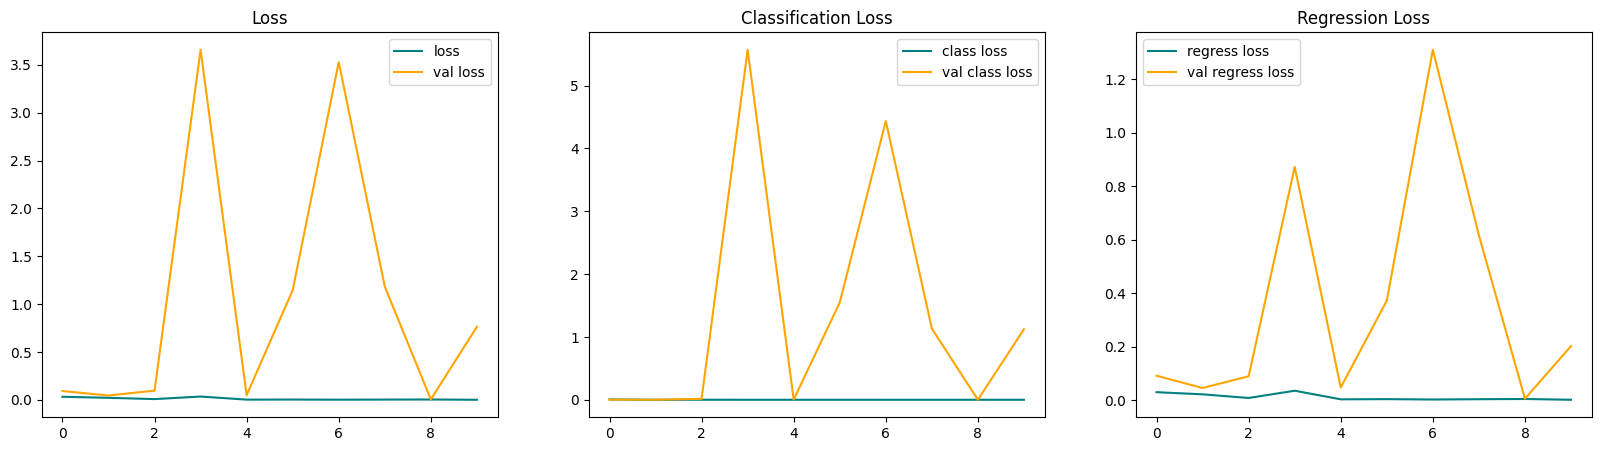

In [131]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# Predictions

In [132]:
test_data = test.as_numpy_iterator()

In [152]:
test_sample = test_data.next()
yhat = tracker.predict(test_sample[0])

1/1 [==============================] - 0s 351ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


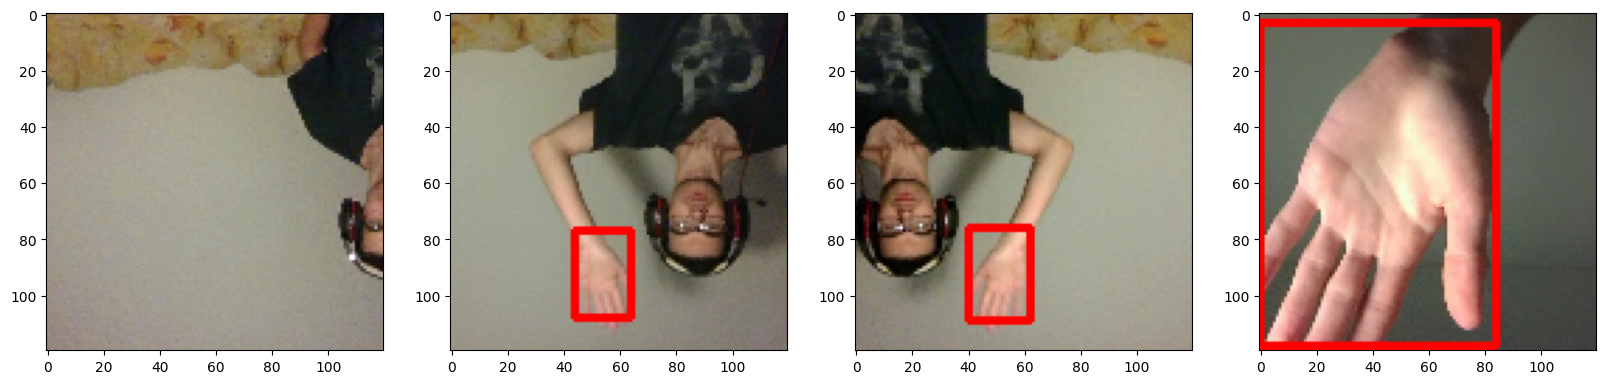

In [153]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = test_sample[0][idx]
    sample_coords = yhat[1][idx]

    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image,
                      tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                      (255, 0, 0), 2)

    ax[idx].imshow(sample_image)

In [11]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))
import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))

[]
tf.Tensor(-1099.1743, shape=(), dtype=float32)


In [1]:
from tensorflow.keras.models import load_model

2023-11-25 17:35:14.325960: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-25 17:35:14.413507: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 17:35:14.779188: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 17:35:14.779298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 17:35:14.840321: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [155]:
tracker.save('tracker.h5')

/mnt/e/UBB_IE_2020-2023/S6.BE/v3/handrecognitionvenv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
tracker = load_model('tracker.h5')

2023-11-25 17:35:20.323601: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-25 17:35:20.451255: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
import cv2
import tensorflow as tf
import numpy as np


cap = cv2.VideoCapture(0)
while cap.isOpened():
    _, frame = cap.read()
    frame = frame[50:500, 50:500, :]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120, 120))

    yhat = tracker.predict(np.expand_dims(resized / 255, 0))
    sample_coords = yhat[1][0]

    if yhat[0] > 0.5:
        # Controls the main rectangle
        cv2.rectangle(frame,
                      tuple(np.multiply(sample_coords[:2], [450, 450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450, 450]).astype(int)),
                      (255, 0, 0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame,
                      tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                   [0, -30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                   [80, 0])),
                      (255, 0, 0), -1)

        # Controls the text rendered
        cv2.putText(frame, 'hand', tuple(np.add(np.multiply(sample_coords[:2], [450, 450]).astype(int),
                                                [0, -5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    cv2.imshow('HandTrack', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 52ms/step
